In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
df = pd.read_csv("datasets/Heart Disease UCI.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

# Data Preparation

<font color = 'blue'> null values in dataset </font>

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<font color ='blue'> duplicated columns </font>

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True,keep='first')

In [8]:
df.duplicated().sum()

0

# Feature Engineering

### Data Context (given with dataset)

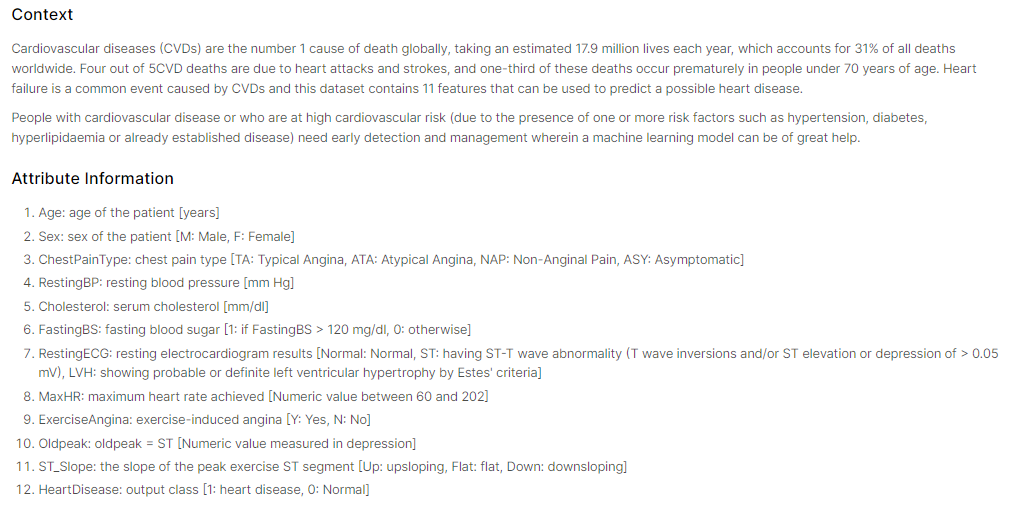

### rename columns 

In [9]:
df.rename(columns={
        'cp':'chest_pain_type',
        'trestbps':'resting_blood_pressure',
        'chol':'cholestoral',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_ECG',
        'thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina',
        'oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST',
        'ca':'major_vessels'},
    inplace=True)

### Update (map) categorical attribute values (features) for better readability & plotting.

In [10]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})

In [11]:
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})

In [12]:
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})

In [13]:
df['resting_ECG'] = df['resting_ECG'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})

In [14]:
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})

In [15]:
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})

In [16]:
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})

In [17]:
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

In [18]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


### Statistical Summary

In [19]:
df.describe(include=['O'])

,sex,chest_pain_type,fasting_blood_sugar,resting_ECG,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


In [20]:
[ print("\n --- \n",df[col].value_counts(),end='\n ========')
 for col in df if col in 
 ['sex','chest_pain_type',
  'fasting_blood_sugar',
  'resting_ECG',
  'excercise_induced_angina',
  'slope_peak_exercise_ST',
  'thai',
  'target']]


 --- 
 male      206
female     96
Name: sex, dtype: int64
 --- 
 typical angina     143
non-anginal         86
atypical angina     50
asymptomatic        23
Name: chest_pain_type, dtype: int64
 --- 
 > 120 mg/dl    257
< 120 mg/dl     45
Name: fasting_blood_sugar, dtype: int64
 --- 
 ST-T wave abnormality      151
normal                     147
ventricular hypertrophy      4
Name: resting_ECG, dtype: int64
 --- 
 downsloping    141
flat           140
upsloping       21
Name: slope_peak_exercise_ST, dtype: int64
 --- 
 disease       164
no disease    138
Name: target, dtype: int64

[None, None, None, None, None, None]

### Splitting Categorical and Numerical Data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    object 
 2   chest_pain_type          302 non-null    object 
 3   resting_blood_pressure   302 non-null    int64  
 4   cholestoral              302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    object 
 6   resting_ECG              302 non-null    object 
 7   maximum_heart_rate       302 non-null    int64  
 8   exercise_induced_angina  302 non-null    object 
 9   ST_depression            302 non-null    float64
 10  slope_peak_exercise_ST   302 non-null    object 
 11  major_vessels            302 non-null    int64  
 12  thal                     302 non-null    object 
 13  target                   302 non-null    object 
dtypes: float64(1), int64(5), o

In [22]:
df.keys()

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'resting_ECG',
       'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression',
       'slope_peak_exercise_ST', 'major_vessels', 'thal', 'target'],
      dtype='object')

In [23]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


# Exploratory Data Analysis

In [24]:

cat_nom = ['sex','chest_pain_type','fasting_blood_sugar','resting_ECG','exercise_induced_angina',
           'slope_peak_exercise_ST','thal']

cat_ord = ['major_vessels']

cat = ['sex','chest_pain_type','fasting_blood_sugar','resting_ECG','exercise_induced_angina',
       'slope_peak_exercise_ST','thal','major_vessels']

num     = ['age','resting_blood_pressure','cholestoral','maximum_heart_rate','ST_depression']

y_target = ['target']



## Categorical variables

In [25]:
sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2) 

=== Sex:                                                          ====
target      sex   
disease     male      56.097561
            female    43.902439
no disease  male      82.608696
            female    17.391304
Name: sex, dtype: float64


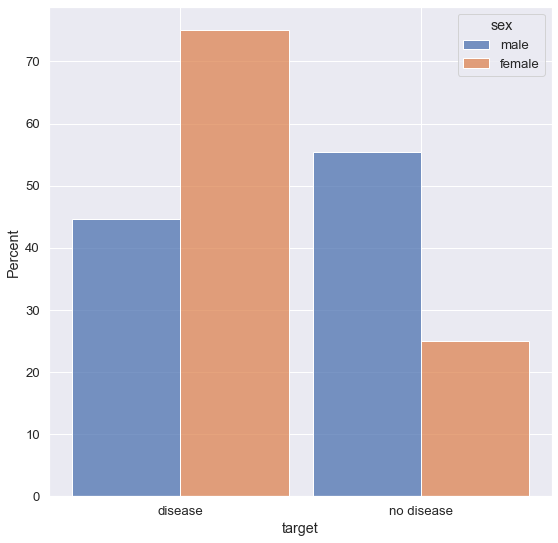

=== Chest pain type:                                              ====
target      chest_pain_type
disease     non-anginal        41.463415
            atypical angina    25.000000
            typical angina     23.780488
            asymptomatic        9.756098
no disease  typical angina     75.362319
            non-anginal        13.043478
            atypical angina     6.521739
            asymptomatic        5.072464
Name: chest_pain_type, dtype: float64


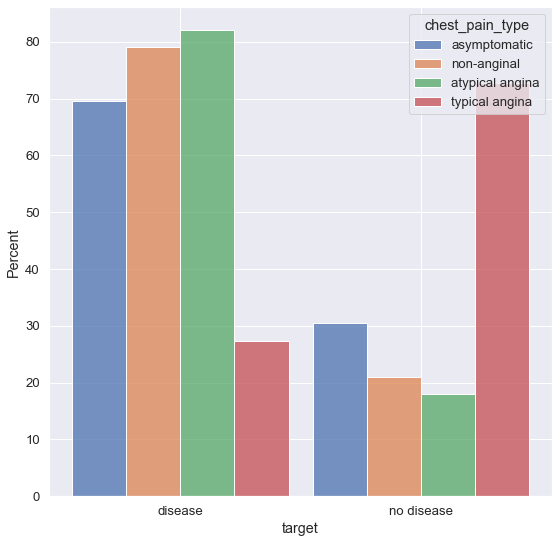

=== Fasting blood sugar:                                          ====
target      fasting_blood_sugar
disease     > 120 mg/dl            85.975610
            < 120 mg/dl            14.024390
no disease  > 120 mg/dl            84.057971
            < 120 mg/dl            15.942029
Name: fasting_blood_sugar, dtype: float64


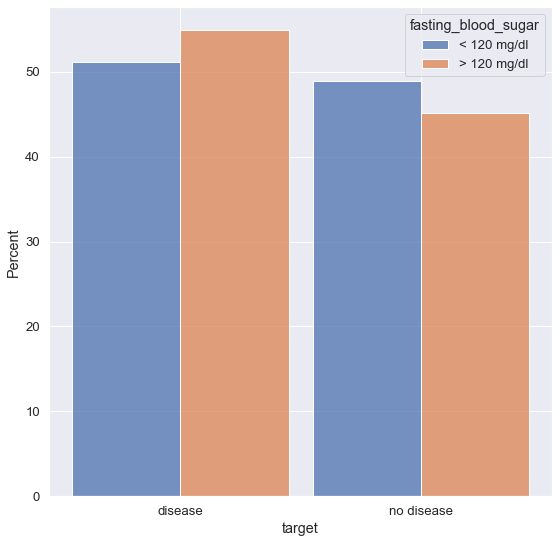

=== Resting ecg:                                                  ====
target      resting_ECG            
disease     ST-T wave abnormality      57.926829
            normal                     41.463415
            ventricular hypertrophy     0.609756
no disease  normal                     57.246377
            ST-T wave abnormality      40.579710
            ventricular hypertrophy     2.173913
Name: resting_ECG, dtype: float64


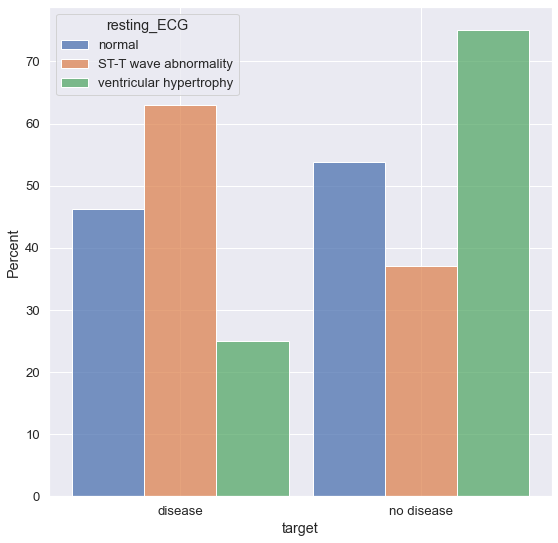

=== Exercise induced angina:                                      ====
target      exercise_induced_angina
disease     no                         85.975610
            yes                        14.024390
no disease  yes                        55.072464
            no                         44.927536
Name: exercise_induced_angina, dtype: float64


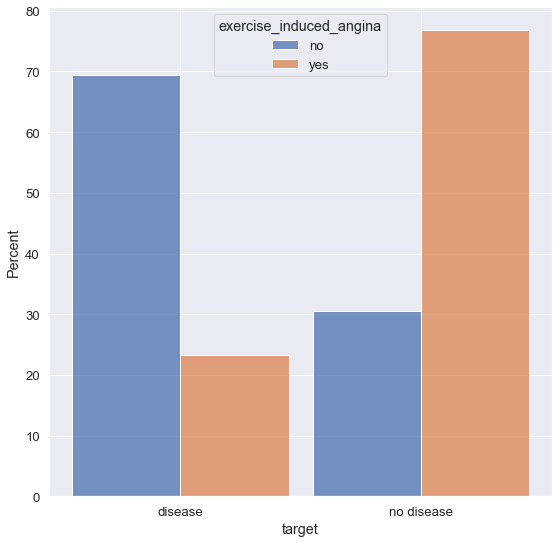

=== Slope peak exercise st:                                       ====
target      slope_peak_exercise_ST
disease     downsloping               64.634146
            flat                      29.878049
            upsloping                  5.487805
no disease  flat                      65.942029
            downsloping               25.362319
            upsloping                  8.695652
Name: slope_peak_exercise_ST, dtype: float64


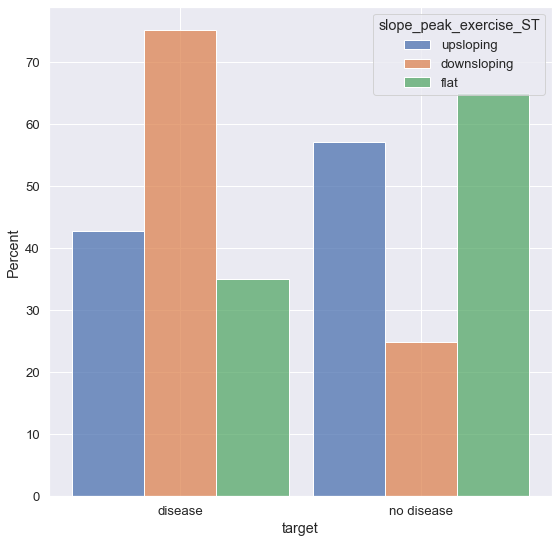

=== Thal:                                                         ====
target      thal             
disease     fixed defect         78.658537
            reversable defect    17.073171
            normal 1              3.658537
            normal 0              0.609756
no disease  reversable defect    64.492754
            fixed defect         26.086957
            normal 1              8.695652
            normal 0              0.724638
Name: thal, dtype: float64


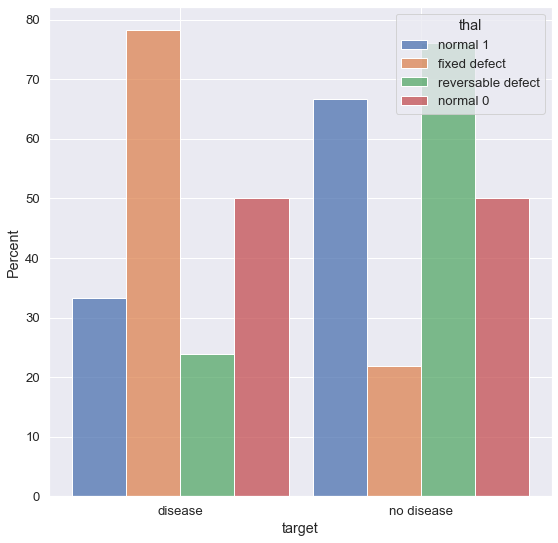

=== Major vessels:                                                ====
target      major_vessels
disease     0                79.268293
            1                12.804878
            2                 4.268293
            3                 1.829268
            4                 1.829268
no disease  0                32.608696
            1                31.884058
            2                22.463768
            3                12.318841
            4                 0.724638
Name: major_vessels, dtype: float64


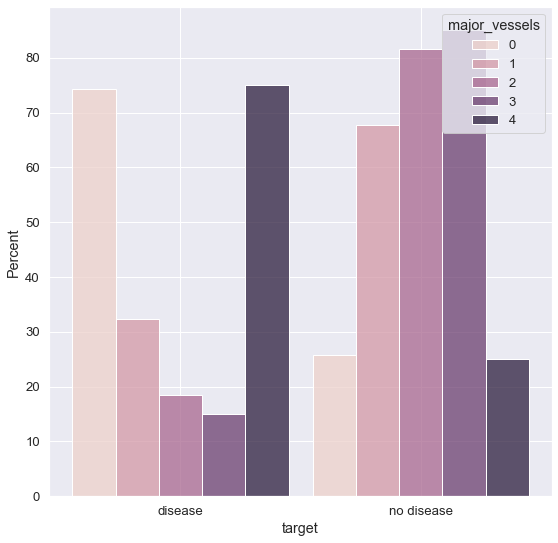

In [43]:
for ele in cat:
    print('='* 70)
    print(f'=== {ele.replace("_"," ").capitalize()}:' + ' ' * (61 - len(ele)) + '====')
    print('='* 70)
    print(df.groupby('target')[ele].value_counts(normalize = True) * 100)
    new_plot = sns.histplot(data = df, x = 'target', hue = ele,common_norm= False,multiple='dodge',stat='percent',shrink=0.9)
    plt.show()

### Observations:

- sex: the disease is more represented with females than males


- chest_pain_type: asymptomatic chest pain is mostly prevelent in 
non diseased people. while the other chest pain types are more represented
with sick patients.


- fasting_blood_sugar: slight increase in sick patients with >120 mg/dl fasting blood
pressure


- resting_ECG: ST-T wave abnormality is more represented with Diseased patients
while ventricular hypertrophy is less represented.


- exercise_induced_angina: exercise induced_angina is less represented 
with heart disease patients than healthy people.


- slope_peak_exercise_ST: downsloping was more prevelent with heart disease
patients


- thal: fixed defect is more prevelent in diseased patients. However, 
reversable defect is more prevelent with healthy people.


- major_vessels: heart disease patients are mostly represented with 0 or 4
values. while healthy people are between 1 and 3





=== Age:                                                          ====
            count       mean       std   min    25%   50%   75%   max
target                                                               
disease     164.0  52.585366  9.511957  29.0  44.75  52.0  59.0  76.0
no disease  138.0  56.601449  7.962082  35.0  52.00  58.0  62.0  77.0


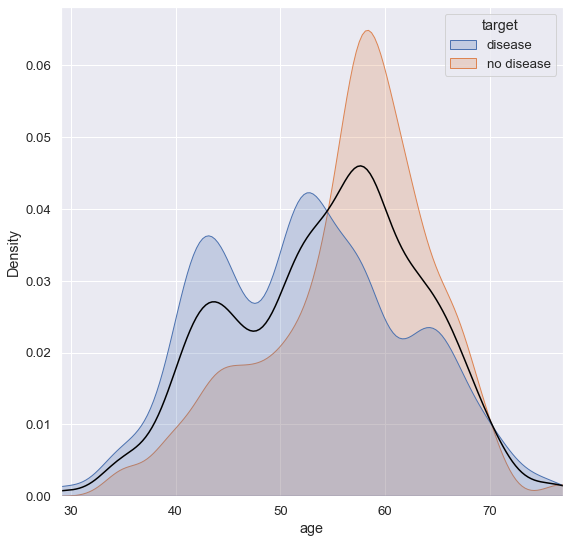

=== Resting blood pressure:                                       ====
            count        mean        std    min    25%    50%     75%    max
target                                                                      
disease     164.0  129.250000  16.204739   94.0  120.0  130.0  140.00  180.0
no disease  138.0  134.398551  18.729944  100.0  120.0  130.0  144.75  200.0


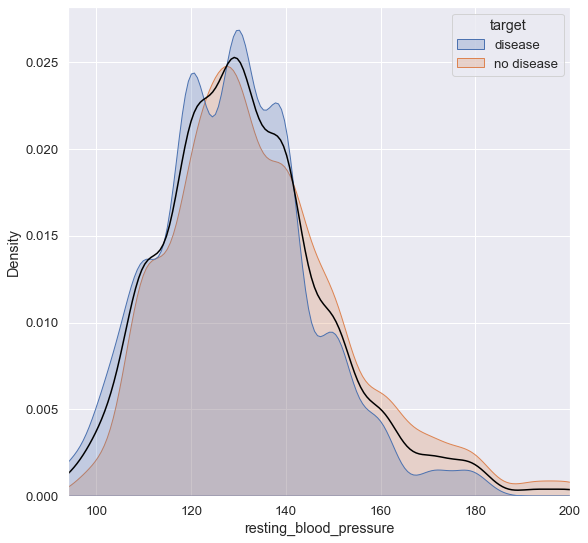

=== Cholestoral:                                                  ====
            count        mean        std    min     25%    50%     75%    max
target                                                                       
disease     164.0  242.640244  53.456580  126.0  208.75  234.5  267.25  564.0
no disease  138.0  251.086957  49.454614  131.0  217.25  249.0  283.00  409.0


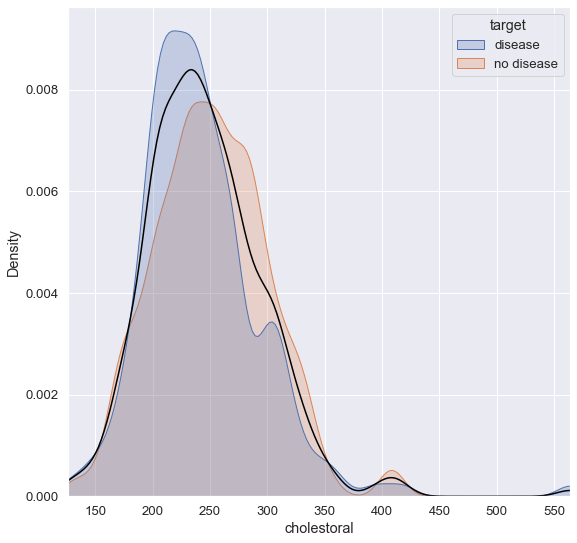

=== Maximum heart rate:                                           ====
            count        mean        std   min     25%    50%    75%    max
target                                                                     
disease     164.0  158.378049  19.199080  96.0  148.75  161.0  172.0  202.0
no disease  138.0  139.101449  22.598782  71.0  125.00  142.0  156.0  195.0


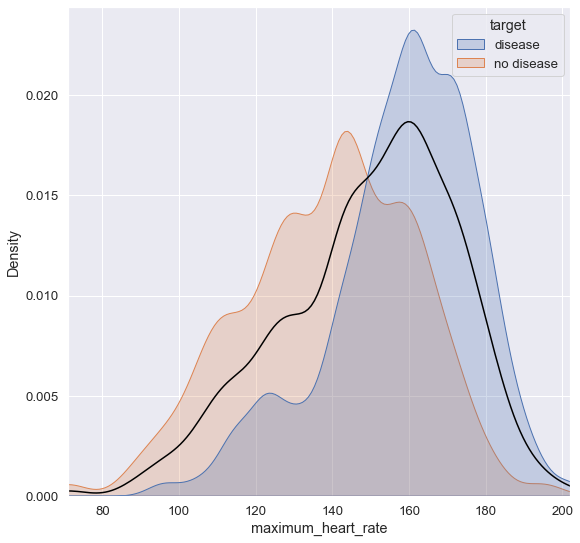

=== St depression:                                                ====
            count      mean       std  min  25%  50%    75%  max
target                                                          
disease     164.0  0.586585  0.781734  0.0  0.0  0.2  1.025  4.2
no disease  138.0  1.585507  1.300340  0.0  0.6  1.4  2.500  6.2


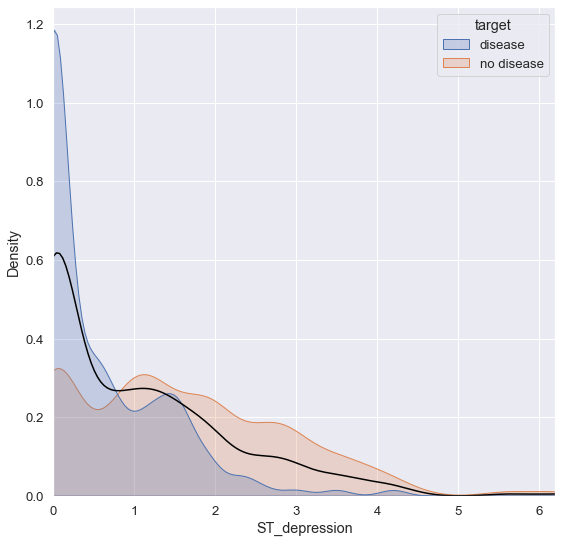

In [45]:
for ele in num:
    print('='* 70)
    print(f'=== {ele.replace("_"," ").capitalize()}:' + ' ' * (61 - len(ele)) + '====')
    print('='* 70)
    print(df.groupby('target')[ele].describe())
    sns.kdeplot(data = df, x = ele , hue = 'target',common_norm= False,multiple='layer',
                shade=True,bw_adjust = 0.6,common_grid=True)
    sns.kdeplot(data = df, x = ele, common_norm=False, color='black',shade=False,bw_adjust = 0.7)
    plt.xlim([df[ele].min(),df[ele].max()])
    plt.show()

### Graphing ST_depression without zero values

=== St depression:                                                ====
            count      mean       std  min  25%  50%    75%  max
target                                                          
disease     164.0  0.586585  0.781734  0.0  0.0  0.2  1.025  4.2
no disease  138.0  1.585507  1.300340  0.0  0.6  1.4  2.500  6.2


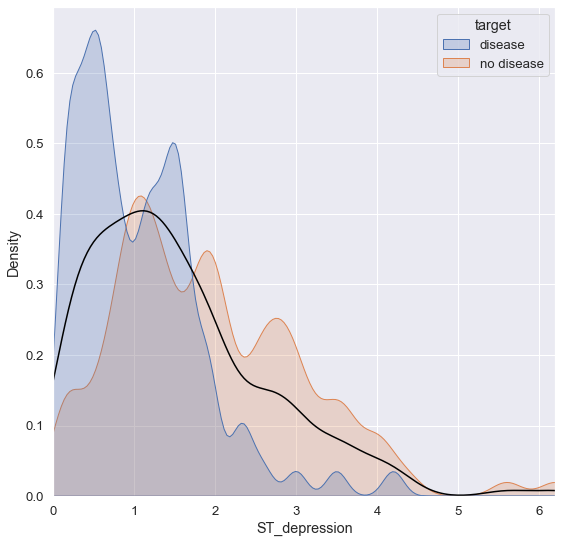

In [46]:
ele = 'ST_depression'

print('='* 70)
print(f'=== {ele.replace("_"," ").capitalize()}:' + ' ' * (61 - len(ele)) + '====')
print('='* 70)
print(df.groupby('target')[ele].describe())
sns.kdeplot(data = df[df['ST_depression'] != 0], x = ele , hue = 'target',common_norm= False,multiple='layer',
            shade=True,bw_adjust = 0.4,common_grid=True)
sns.kdeplot(data = df[df['ST_depression'] != 0], x = ele, common_norm=False, color='black',shade=False,common_grid=True,bw_adjust = 0.7)
plt.xlim([df[ele].min(),df[ele].max()])
plt.show()

In [55]:
(df['ST_depression'] == 0).mean()

0.32450331125827814

<font color = 'orange'> 32% of the data has ST_depression equal zero. this observation needs to be confirmed by the business side to discuss if that has significant importance or if it should be dealt with as a problem with the data. for now, we will continue as usual</font>

### Observations:

- age: most people in our dataset with not heart disease are around 60 years old with a left skew. while, people with heart disease are almost normally distributed around 50.


- resting blood pressure: all of the data is right skewed with a median of around 120. nothing to conclude


- cholestoral: people without heart disease have a slightly higher median (~15 points difference)


- maximum_heart_rate: people with heart Disease have a noticabily higher maximum Heart Rate (~20 points higher) with a stronger left skew than the rest of the data


- st_depression: a lot of the data has ST_depression at 0, skewing the data to the right


- st_depression (without zero): people with heart have an overall average lower ST_depression score at the median (~0.2 compared to 1.4)  
 

# Machine Learning model

In [57]:
df = pd.read_csv("datasets/Heart Disease UCI.csv")

df.rename(columns={
        'cp':'chest_pain_type',
        'trestbps':'resting_blood_pressure',
        'chol':'cholestoral',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_ECG',
        'thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina',
        'oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST',
        'ca':'major_vessels'},
    inplace=True)

In [59]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
def prep_data(X,y,sample = True):
    from sklearn.model_selection import train_test_split
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.preprocessing import StandardScaler
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    if sample:
        sampler = RandomUnderSampler()
        X_train, y_train = sampler.fit_resample(X_train,y_train)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [61]:
X = df.drop('target',axis = 1)
y = df[['target']]

X_train, X_test, y_train, y_test = prep_data(X,y)

In [63]:
def plot_y(true_value,predicted_value, model_type = 'regression', model = np.nan):
    from sklearn.metrics import confusion_matrix, roc_curve
    import matplotlib.pyplot as plt
    
    if model_type == 'regression':
        plt.figure(figsize=(10,10))
        plt.scatter(true_value, predicted_value, c='crimson')
        plt.yscale('log')
        plt.xscale('log')

        p1 = max([max(predicted_value), max(true_value)])
        p2 = min([min(predicted_value), min(true_value)])
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        plt.show();
        
    elif model_type == 'classification':
        confusion = confusion_matrix(true_value,predicted_value)
        
        if model != np.nan:
            
            plt.figure(figsize=(15, 7))
            
            
            #Predicted Probabilities
            plt.subplot(1,2,1)
            y_pred_prob = model.predict_proba(X_test)[:, 1]
            plt.hist(y_pred_prob, bins=8)
            
            # Predicted Probabilities Hist
            plt.xlim(0,1)
            plt.title('Histogram of predicted probabilities')
            plt.xlabel('Predicted probabilities')
            plt.ylabel('Frequency')
#             plt.show()
            
            #ROC_Curve
            plt.subplot(1,2,2)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.rcParams['font.size'] = 12
            plt.title('ROC curve for classifier')
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.grid(True)
            
            
            plt.show()
            

In [64]:
def results_classification(y_train,y_pred,name = 'model',model = None,printing = True):
    from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
    results = pd.DataFrame(columns= ['Name','precision','recall','f1'])
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    if printing:
        print(f'Training           {name}...')
        print(f'accuracy:          {accuracy}')
        print(f'Testing precision: {precision}')
        print(f'Testing recall:    {recall}')
        print(f'Testing f1:        {f1}')

    results = results.append({'Name':name,'model':model, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1 },ignore_index = True)
    return results

In [65]:
def train_classification_models(X_train,X_test,y_train,y_test,plotting = True, printing = True):
#     from sklearn.linear_model import LinearRegress
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    import matplotlib.pyplot as plt
    
    flat_list = [item for sublist in y_test.values for item in sublist]
    flat_train = [item for sublist in y_train.values for item in sublist]

    models = {
        'DT': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(kernel='poly',degree=3), 
        'RF': RandomForestClassifier(),
        'XGB': XGBClassifier()
    }
    
    df_results = pd.DataFrame(columns= ['Name','precision','recall','f1'])
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df_results = df_results.append(results_classification(y_train,y_pred,model=model, name = name,printing = printing),ignore_index=True)
        if plotting:
            if name != 'SVM':
                plot_y(flat_list,y_pred,model_type='classification',model = model)
#             else:
#                 plot_y(flat_list,y_pred,model_type='classification')
        
        if (plotting|printing):
            print('-'*50)
        
    return df_results

Training           DT...
accuracy:          0.8032786885245902
Testing precision: 0.7428571428571429
Testing recall:    0.896551724137931
Testing f1:        0.8125


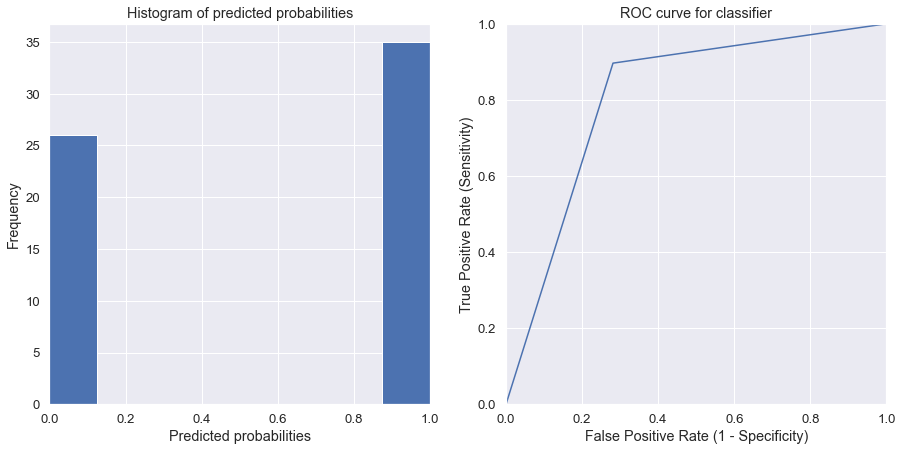

--------------------------------------------------
Training           KNN...
accuracy:          0.7540983606557377
Testing precision: 0.7058823529411765
Testing recall:    0.8275862068965517
Testing f1:        0.7619047619047619


G:\Apps\Anaconda\install\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


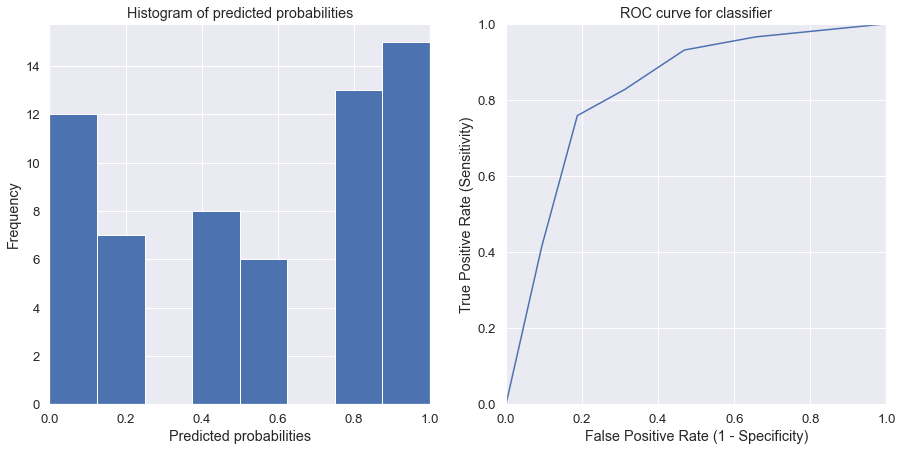

--------------------------------------------------
Training           SVM...
accuracy:          0.7540983606557377
Testing precision: 0.6944444444444444
Testing recall:    0.8620689655172413
Testing f1:        0.7692307692307692
--------------------------------------------------
Training           RF...
accuracy:          0.7377049180327869
Testing precision: 0.6857142857142857
Testing recall:    0.8275862068965517
Testing f1:        0.75


G:\Apps\Anaconda\install\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-65-0aaca054c1a2>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


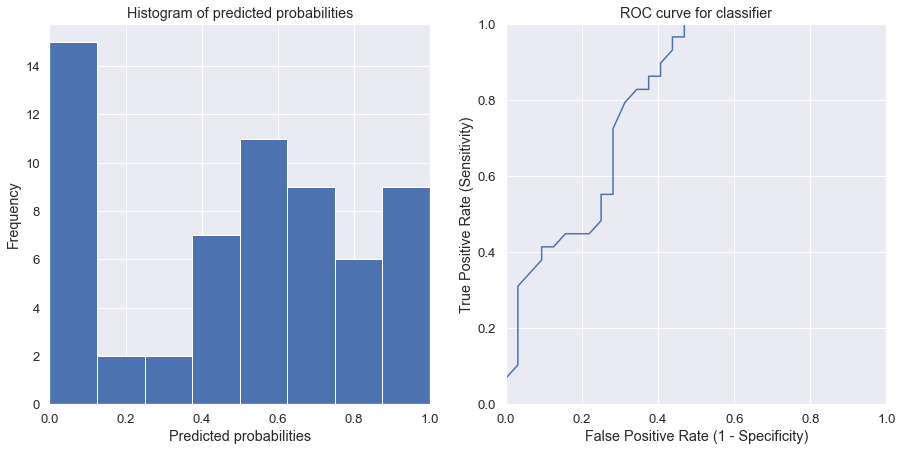

--------------------------------------------------
[01:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training           XGB...
accuracy:          0.7704918032786885
Testing precision: 0.7272727272727273
Testing recall:    0.8275862068965517
Testing f1:        0.7741935483870968


G:\Apps\Anaconda\install\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
G:\Apps\Anaconda\install\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
G:\Apps\Anaconda\install\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


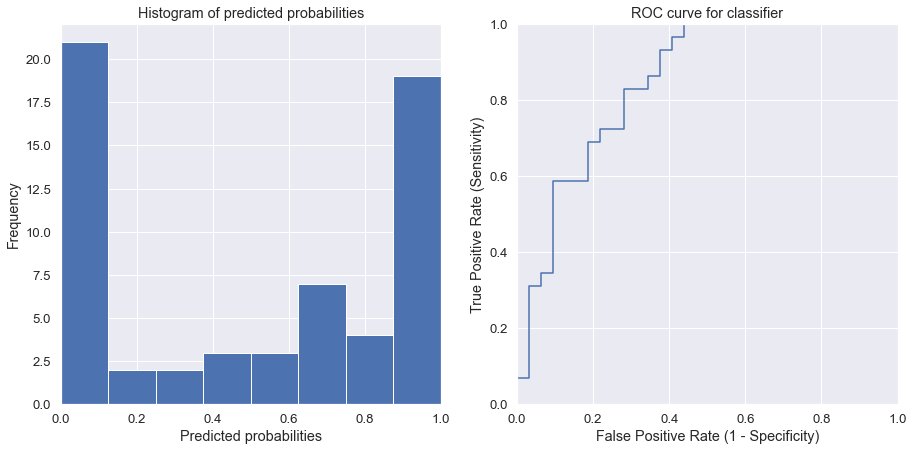

--------------------------------------------------


In [95]:
results1 = train_classification_models(X_train,X_test,y_train,y_test)

In [67]:
results1

,Name,precision,recall,f1,accuracy,model
0,DT,0.685714,0.827586,0.750000,0.737705,DecisionTreeClassifier()
1,KNN,0.705882,0.827586,0.761905,0.754098,KNeighborsClassifier()
2,SVM,0.694444,0.862069,0.769231,0.754098,SVC(kernel='poly')
3,RF,0.696970,0.793103,0.741935,0.737705,"(DecisionTreeClassifier(max_features='auto', r..."
4,XGB,0.727273,0.827586,0.774194,0.770492,"XGBClassifier(base_score=0.5, booster='gbtree'..."


# Feature Importance

In [68]:
def plt_importance(data,model):
    features = df.columns[:df.shape[1]]
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Relative Importance');

model DT :


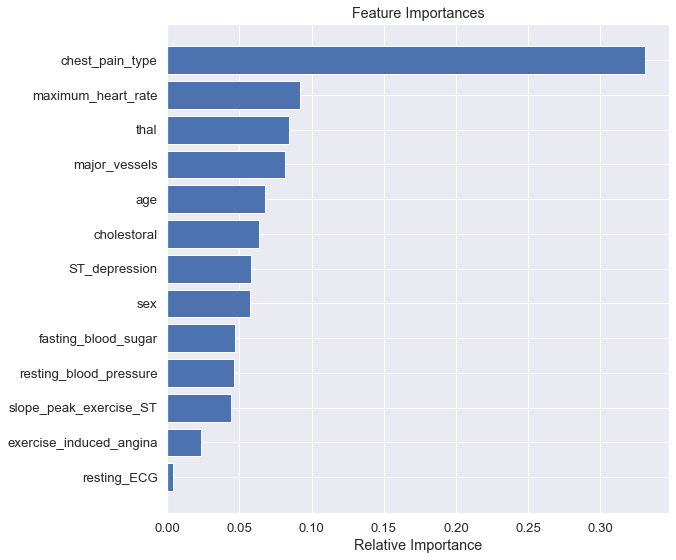

model RF :


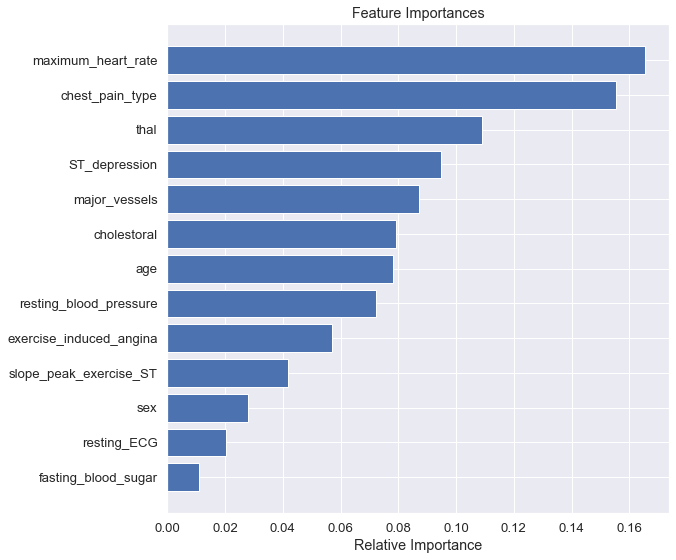

model XGB :


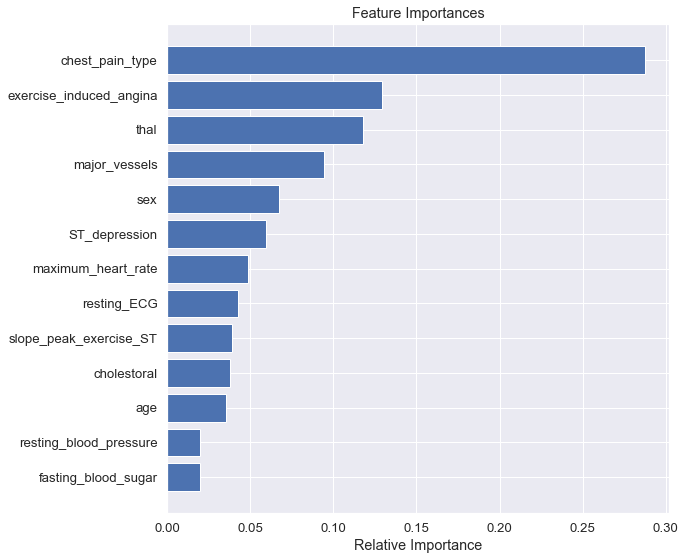

In [96]:
for i in [0,3,4]:
    print('model',results1['Name'][i],':')
    plt_importance(data =df, model = results1['model'][i]) 
    plt.show()

In [97]:
results1

,Name,precision,recall,f1,accuracy,model
0,DT,0.742857,0.896552,0.812500,0.803279,DecisionTreeClassifier()
1,KNN,0.705882,0.827586,0.761905,0.754098,KNeighborsClassifier()
2,SVM,0.694444,0.862069,0.769231,0.754098,SVC(kernel='poly')
3,RF,0.685714,0.827586,0.750000,0.737705,"(DecisionTreeClassifier(max_features='auto', r..."
4,XGB,0.727273,0.827586,0.774194,0.770492,"XGBClassifier(base_score=0.5, booster='gbtree'..."


# Precision vs Recall?


Since our problem is detecing people who are more likely to get heart disease, it makes more business sense to focus more on recall... as we don't want to miss anyone who might have heart disease and risk their lives. so a more 'strict' model would be more desireable (ex: Decision Tree) here than a well rounded one like a KNN/RF.

In [98]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier()

# Grid Search

In [100]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameters = {
    'min_samples_split': range(1,20),
    'min_samples_leaf' : range(1,20),
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=parameters,
    scoring = 'recall',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 361 candidates, totalling 3610 fits


G:\Apps\Anaconda\install\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 3610.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "G:\Apps\Anaconda\install\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "G:\Apps\Anaconda\install\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "G:\Apps\Anaconda\install\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)},
             scoring='recall', verbose=True)

In [119]:
model = grid_search.best_estimator_
model

DecisionTreeClassifier(min_samples_leaf=14)

In [120]:
y_pred = model.predict(X_test)

In [121]:
results_classification(y_train,y_pred,name='grid_DT1',model=model)

Training           grid_DT1...
accuracy:          0.8032786885245902
Testing precision: 0.7428571428571429
Testing recall:    0.896551724137931
Testing f1:        0.8125


,Name,precision,recall,f1,accuracy,model
0,grid_DT1,0.742857,0.896552,0.8125,0.803279,DecisionTreeClassifier(min_samples_leaf=14)


In [122]:
results1[results['Name'] == 'DT']

,Name,precision,recall,f1,accuracy,model
0,DT,0.742857,0.896552,0.8125,0.803279,DecisionTreeClassifier()


<font color = 'green'> <h2>after the Grid search, we still got the exact same results. </font>